In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns 
print("libraries imported")

libraries imported


In [6]:
file_path = r"C:\Users\dell\Desktop\insurance\insurance.csv"
df = pd.read_csv(file_path)  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# finding duplicates record 
print("Duplicate records : ",df.duplicated().sum())

Duplicate records :  1


In [9]:
# checking missing value 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
df.columns  = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']

In [12]:
df.head(2)

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [13]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
df['charges'].min()

np.float64(1121.8739)

In [16]:
df['charges'].max()

np.float64(63770.42801)

In [17]:
df['charges'].mean()

np.float64(13270.422265141257)

In [18]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']

In [19]:
print("Female charges : ",female['charges'].mean())
print("Male charges : ",male['charges'].mean())

Female charges :  12569.578843835347
Male charges :  13956.751177721893


In [20]:
female['smoker'].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [21]:
male['smoker'].value_counts()

smoker
no     517
yes    159
Name: count, dtype: int64

In [22]:
print("Total Girls : ", female.shape[0]) 
print("Total Boys : ", male.shape[0] )
     

Total Girls :  662
Total Boys :  676


In [23]:
average_charges = female['charges'].mean()
df2 = female[female['charges'] <= average_charges]
df2.head()

,age,gender,bmi,child,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [24]:
print("Total Girls : ", df2.shape[0]) 

Total Girls :  441


In [25]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [26]:
average_charges = male['charges'].mean()
df3 = male[male['charges'] <= average_charges]
df3.head()

,age,gender,bmi,child,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
8,37,male,29.83,2,no,northeast,6406.4107
10,25,male,26.22,0,no,northeast,2721.3208


In [27]:
print("Total Mail : ", df3.shape[0]) 

Total Mail :  466


In [28]:
df3['smoker'].value_counts()

smoker
no     464
yes      2
Name: count, dtype: int64

In [29]:
male_region = male.groupby('region')

In [30]:
male_region[['charges']].min()

,charges
region,
northeast,1694.7964
northwest,1621.3402
southeast,1121.8739
southwest,1241.5650


In [31]:
male_region[['charges']].max()

,charges
region,
northeast,48549.17835
northwest,60021.39897
southeast,62592.87309
southwest,52590.82939


In [32]:
male_region[['charges']].mean()

,charges
region,
northeast,13854.005374
northwest,12354.119575
southeast,15879.617173
southwest,13412.883576


In [33]:
male_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')

,min_charges,max_charges,mean_charges
region,,,
northeast,1694.7964,48549.17835,13854.005374
northwest,1621.3402,60021.39897,12354.119575
southeast,1121.8739,62592.87309,15879.617173
southwest,1241.5650,52590.82939,13412.883576


In [34]:
female_region = female.groupby('region')
female_group_analysis = female_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')
female_group_analysis

,min_charges,max_charges,mean_charges
region,,,
northeast,2196.47320,58571.07448,12953.203151
northwest,2117.33885,55135.40209,12479.870397
southeast,1607.51010,63770.42801,13499.669243
southwest,1727.78500,48824.45000,11274.411264


In [35]:
female_regions = list(female_group_analysis['mean_charges'].index)
female_regions

['northeast', 'northwest', 'southeast', 'southwest']

In [36]:
average_charges = list(female_group_analysis['mean_charges'].values)
average_charges

[np.float64(12953.203151298138),
 np.float64(12479.870396585366),
 np.float64(13499.669242914284),
 np.float64(11274.411263641974)]

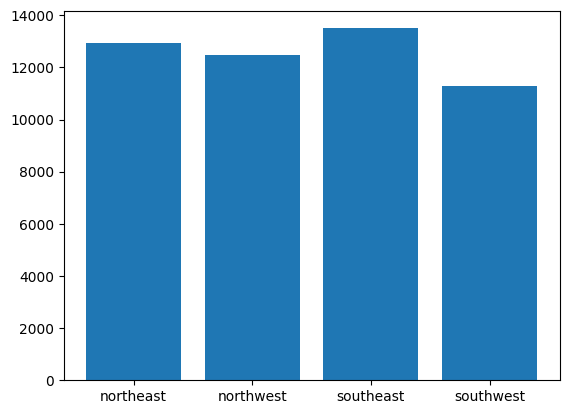

In [37]:
plt.bar(female_regions,average_charges)
plt.show()

In [38]:
ls = list(df['bmi'])

In [39]:
ls = list(df['bmi'])
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [40]:
df['health_category'] = label

In [41]:
df.head()

,age,gender,bmi,child,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [42]:
# gender ==> onehot encode   
gender_dict = {'female':0,'male':1}
smoker_dict = {'yes':1,'no':0}

df['gender'] = df['gender'].map(gender_dict)
df['smoker'] = df['smoker'].map(smoker_dict)

In [43]:
df.health_category

0          Overweight
1               obese
2               obese
3       HealthyWeight
4          Overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       Overweight
1337       Overweight
Name: health_category, Length: 1338, dtype: object

In [44]:
df.health_category.value_counts()
## pie plot()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

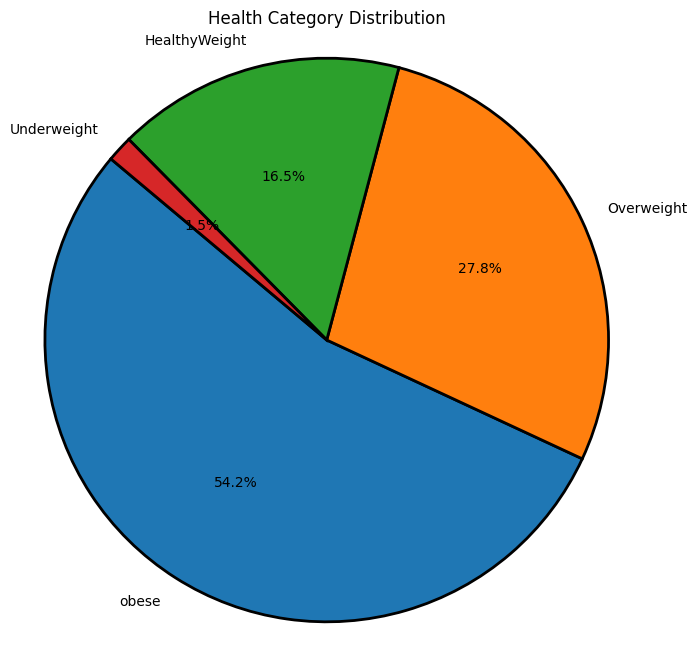

In [45]:
value_counts = df['health_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,wedgeprops={'ec':'k','lw':2})
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()

In [46]:
df['health_category'].value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [47]:
health_category_dict = {'Underweight':1,'HealthyWeight':2,'Overweight':3,'obese':4}
df['health_category'] = df['health_category'].map(health_category_dict)

In [48]:
df.head()

,age,gender,bmi,child,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [49]:
# region
final_data = pd.get_dummies(df).astype(int)
final_data.head()

,age,gender,bmi,child,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [50]:
###  x and y split  
x = final_data.drop('charges',axis='columns')
y = final_data[['charges']]

In [51]:
### Training training and testing split test_size= 0.2
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.8) 

In [53]:
## Model Training  
# Regression 
# 1 LinearRegression 
# 2 .DecisionTree 
# RandomForeset 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 

In [54]:
## object creation
# Hyper parameter turning  ---> to obtained highest accuracy 
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()
# i am going with default parameters

In [55]:
import warnings 
warnings.filterwarnings('ignore')

In [56]:
x_train.isnull().sum()

age                 0
gender              0
bmi                 0
child               0
smoker              0
health_category     0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [57]:
## model train 
lnr.fit(x_train,y_train) 
dtr.fit(x_train,y_train) 
rdmfr.fit(x_train,y_train) 
print('You have trained your all algorithms ')

You have trained your all algorithms 


In [58]:
## Model Evaluation 

print("Training score by linear : ",lnr.score(x_train,y_train)*100 )
print("Training score by DecisionTree : ",dtr.score(x_train,y_train)*100)
print("Training score by RandomForest : ",rdmfr.score(x_train,y_train)*100) 

print() 

print("Testing score by linear : ",lnr.score(x_test,y_test)*100 )
print("Testing score by DecisionTree : ",dtr.score(x_test,y_test)*100)
print("Testing score by RandomForest : ",rdmfr.score(x_test,y_test)*100)

Training score by linear :  77.02498695185132
Training score by DecisionTree :  99.81807460246071
Training score by RandomForest :  97.80983381359374

Testing score by linear :  68.40661700556625
Testing score by DecisionTree :  70.19428750295621
Testing score by RandomForest :  77.97792635979877


In [59]:
### prediction  
prediction_liner = lnr.predict(x_test)
prediction_Decisiontree = dtr.predict(x_test)
prediction_randomforest = rdmfr.predict(x_test)

In [60]:
comparison_df = pd.concat([x_test,y_test],axis=1)
comparison_df.head()

,age,gender,bmi,child,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges
1130,39,0,23,5,0,2,0,0,1,0,8582
1189,23,0,28,0,0,3,0,0,0,1,13126
1208,37,0,25,1,1,3,1,0,0,0,20296
291,29,1,29,1,0,3,1,0,0,0,20277
154,40,0,25,1,0,3,1,0,0,0,7077


In [61]:
comparison_df['linear_prediction'] =  prediction_liner
comparison_df['decisionTree_prediction'] =  prediction_Decisiontree
comparison_df['randomforest_prediction'] = prediction_randomforest 

In [62]:
comparison_df.head()

,age,gender,bmi,child,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges,linear_prediction,decisionTree_prediction,randomforest_prediction
1130,39,0,23,5,0,2,0,0,1,0,8582,6843.216629,8965.0,9837.800000
1189,23,0,28,0,0,3,0,0,0,1,13126,2402.871544,10795.0,6171.049167
1208,37,0,25,1,1,3,1,0,0,0,20296,30610.448178,20149.0,20125.130000
291,29,1,29,1,0,3,1,0,0,0,20277,5448.321525,4040.0,4378.940000
154,40,0,25,1,0,3,1,0,0,0,7077,7494.215962,7358.0,7343.580000


In [63]:
comparison_df.to_csv('prediction.csv',index=False) 

In [64]:
import joblib,os 

In [65]:
### SAVING THE MODELS 
os.makedirs('models',exist_ok=True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decisionttree.lb')
joblib.dump(rdmfr,'./models/randomforest.lb')

['./models/randomforest.lb']